<a href="https://colab.research.google.com/github/deepshi03/cs230-code-examples/blob/master/musiq/Inference_with_MUSIQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2022 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

# Image aesthetic scoring with MUSIQ models

In this colab, you can try any of the 4 [MUSIQ](https://ai.googleblog.com/2022/10/musiq-assessing-image-aesthetic-and.html) models to score the aesthetic of an image.

These models have a specific characteristic that it can handle images in any size or aspect ratio, making it not necessary to do any preprocessing on the image


In [12]:
import tensorflow as tf
import tensorflow_hub as hub

import csv
import io
import os
import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

# Load Model

In [13]:
selected_model = 'ava' #@param ['spaq', 'koniq', 'paq2piq', 'ava']

NAME_TO_HANDLE = {
    # Model trained on SPAQ dataset: https://github.com/h4nwei/SPAQ
    'spaq': 'https://tfhub.dev/google/musiq/spaq/1',

    # Model trained on KonIQ-10K dataset: http://database.mmsp-kn.de/koniq-10k-database.html
    'koniq': 'https://tfhub.dev/google/musiq/koniq-10k/1',

    # Model trained on PaQ2PiQ dataset: https://github.com/baidut/PaQ-2-PiQ
    'paq2piq': 'https://tfhub.dev/google/musiq/paq2piq/1',

    # Model trained on AVA dataset: https://ieeexplore.ieee.org/document/6247954
    'ava': 'https://tfhub.dev/google/musiq/ava/1',
}

model_handle = NAME_TO_HANDLE[selected_model]
model = hub.load(model_handle)
predict_fn = model.signatures['serving_default']

print(f'loaded model {selected_model} ({model_handle})')

loaded model ava (https://tfhub.dev/google/musiq/ava/1)


# Util functions

Functions to download an image and to show it.

In [14]:
# def load_image_from_url(img_url):
#   """Returns an image with shape [1, height, width, num_channels]."""
#   user_agent = {'User-agent': 'Colab Sample (https://tensorflow.org)'}
#   response = requests.get(img_url, headers=user_agent)
#   image_bytes = BytesIO(response.content)
#   image = Image.open(image_bytes)
#   return image, response.content

# def show_image(image, title=''):
#   image_size = image.size
#   plt.imshow(image)
#   plt.axis('on')
#   plt.title(title)
#   plt.show()

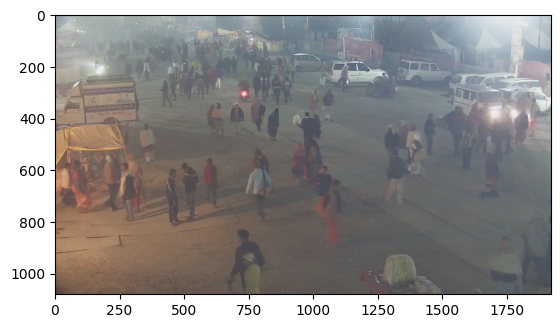

In [29]:
# Path to the image
image_path = '/content/drive/My Drive/findmusiqscoredata/predata/x00/frame_003001.jpg'

# Load and process the image
def load_image_from_drive(image_path):
    return Image.open(image_path)

image = load_image_from_drive(image_path)
image_bytes_io = io.BytesIO()
image.save(image_bytes_io, format=image.format)
image_bytes = image_bytes_io.getvalue()

show_image(image)

# Load an image

The prediction will run directly on the bytes loaded, no preprocessing is needed

In [16]:
# image_url = 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgr0DKaAoO6qTrJo3hXP8UM3D4AB8gQeNI22Q2QphBVGgn-5v84tjhH3ZWTlGtlUoPdlcx54dM93Qi04MuN7eBbj9WlT8Qxy6B2Us4kcn_53FH28MnTtGCzMPhjCVGIgXRL8ZEMeO-7iue7sNEGxBtgx2bI-eKDQAondM8Dfjb1FaybFgUQji4UU9-0vQ/s1024/image9.png' #@param {type: 'string'}

# image, image_bytes = load_image_from_url(image_url)

# show_image(image)

# Run Prediction on a Single Image

In [17]:
# prediction = predict_fn(tf.constant(image_bytes))
# print("predicted MOS: ", prediction)

In [30]:
# Predict MOS
prediction = predict_fn(tf.constant(image_bytes))
predicted_mos = list(prediction.values())[0].numpy()
print(f"Predicted MOS for model {selected_model}: {predicted_mos}")

Predicted MOS for model ava: 4.544519901275635


In [31]:
# Save results
truncated_image_path = image_path.split('/findmusiqscoredata/')[1]
results = [selected_model, truncated_image_path, predicted_mos]

results_folder = '/content/drive/My Drive/findmusiqscoredata/results'
os.makedirs(results_folder, exist_ok=True)
results_file = os.path.join(results_folder, 'ava_model_results.csv')

file_exists = os.path.exists(results_file)
with open(results_file, 'a', newline='') as f:
    writer = csv.writer(f)
    if not file_exists:
        writer.writerow(['Model Name', 'Image Path', 'Predicted MOS'])
    writer.writerow(results)

print(f"Results saved to: {results_file}")

Results saved to: /content/drive/My Drive/findmusiqscoredata/results/ava_model_results.csv
